# Day 1

In [4]:
import pandas as pd



In [5]:
data_path = '../Materials/data/'

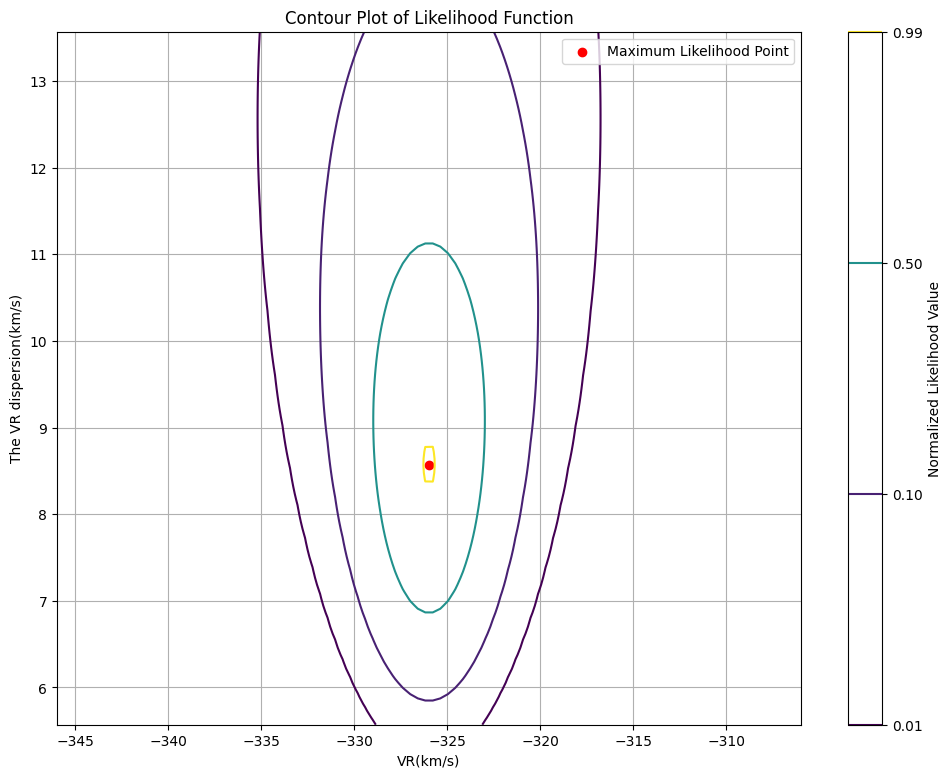

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 定义 likelihood 函数
def likelihood(v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, vr, sigma):
    re = -6 * np.log(2 * np.pi) - 12 * np.log(sigma) - (
        (v1 - vr)**2 + (v2 - vr)**2 + (v3 - vr)**2 + (v4 - vr)**2 +
        (v5 - vr)**2 + (v6 - vr)**2 + (v7 - vr)**2 + (v8 - vr)**2 +
        (v9 - vr)**2 + (v10 - vr)**2 + (v11 - vr)**2 + (v12 - vr)**2
    ) / (2 * sigma**2)
    return re

# 已知的最大值对应的参数
vr_max = -325.98
sigma_max = 8.57

# 参数范围（可以根据实际情况调整）
vr_range = np.linspace(vr_max - 20, vr_max + 20, 100)
sigma_range = np.linspace(sigma_max - 3, sigma_max + 5, 100)

# 生成网格
theta1_grid, theta2_grid = np.meshgrid(vr_range, sigma_range)

# 固定 v1 到 v12 的值
v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12 = (
    -344.73, -323.98, -319.18, -327.82, -321.96, -313.30,
    -334.14, -333.23, -321.67, -314.25, -330.85, -326.63
)

# 计算 likelihood 函数值
likelihood_values = likelihood(
    v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12,
    vr=theta1_grid, sigma=theta2_grid
)

# 归一化
max_likelihood_value = likelihood(v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, vr=vr_max, sigma=sigma_max)
normalized_likelihood_values = np.exp(likelihood_values) / np.exp(max_likelihood_value)

# 绘制等值线图
plt.figure(figsize=(12, 9))
levels = [0.01, 0.1, 0.5, 0.99]  # 设置等值线的值
contour = plt.contour(theta1_grid, theta2_grid, normalized_likelihood_values, levels=levels, cmap='viridis')
plt.colorbar(contour, label='Normalized Likelihood Value')
plt.scatter(vr_max, sigma_max, color='red', label='Maximum Likelihood Point')
plt.xlabel('VR(km/s)')
plt.ylabel('The VR dispersion(km/s)')
plt.title('Contour Plot of Likelihood Function')
plt.grid(True)
plt.legend()
plt.show()